# Gender recognition by voice

### Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Data Profiling Treatment](#section3)<br>
4. [Exploratory Data Analysis](#section4)<br>
5. [Preparing and splitting X and Y](#section5)<br>
6. [Logistic Regression](#section6)<br>
7. [Decision Tree](#section7)<br>
8. [Random Forest](#section8)<br>
9. [KNN](#section9)<br>
10. [SVM](#section10)<br>
11. [Naive Bayes](#section11)<br>
12. [Summary](#section12)<br>


<a id=section1></a>

### 1. Problem Statement

__Gender Recognition by Voice and Speech Analysis__

This database was created to __identify a voice as male or female__, based upon acoustic properties of the voice and speech. The dataset consists of recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range). 

<a id=section1></a>

<a id=section2></a>

### 2. Data Description

The dataset consists of 3168 samples and 21 features.  

| Column Name    | Description                                                      |
| -------------  |:-------------                                                   :| 
| meanfreq       | mean frequency (in kHz)                                          | 
| sd             | standard deviation of frequency                                  |  
| median         | median frequency (in kHz)                                        | 
| Q25            | first quantile (in kHz)                                          |   
| Q75            | third quantile (in kHz)                                          |
| IQR            | interquantile range (in kHz)                                     |
| skew           | skewness (see note in specprop description)                      |
| kurt           | kurtosis (see note in specprop description)                      |
| sp.ent         | spectral entropy                                                 |
| sfm            | spectral flatness                                                |
| mode           | mode frequency                                                   |
| centroid       | frequency centroid (see specprop)                                |
| peakf          | peak frequency (frequency with highest energy)                   |
| meanfun        | average of fundamental frequency measured across acoustic signal |
| minfun         | minimum fundamental frequency measured across acoustic signal    |
| maxfun         | maximum fundamental frequency measured across acoustic signal    |
| meandom        | average of dominant frequency measured across acoustic signal    |
| mindom         | minimum of dominant frequency measured across acoustic signal    |
| maxdom         | maximum of dominant frequency measured across acoustic signal    |
| dfrange        |  range of dominant frequency measured across acoustic signal     |
| modindx        |  modulation index                                                |
| label          |  male or female                                                  |

#### Load packages and data

In [1]:
import numpy as np                                            # Implemennts milti-dimensional array and matrices
import pandas as pd                                           # For data manipulation and analysis
import pandas_profiling
import hypertools as hyp
import matplotlib.pyplot as plt                               # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                         # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline                                           
# Allow plots to appear directly in the notebook

from sklearn import metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML                 
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%%HTML                                 
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid;
        border: 3px solid lightgray;
    }
</style>

In [3]:
#Importing dataset using pd.read_csv
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/gender_recognition_by_voice.csv')    
data.head()                                                  #Gives the first five rows of the dataset

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


<a id=section2></a>

<a id=section3></a>

### 3. Data profiling and treatment

In [4]:
data.shape          #Gives the number of rows and columns in the dataframe

(3168, 21)

In [5]:
data.info()                      #Gives index, datatype and memory info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [6]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


- __Dummification__ of __label__.

In [7]:
voice = data.copy()             #Copy the dataset

In [8]:
voice = pd.get_dummies(voice, columns=['label'], drop_first=True)

<a id=section3></a>

<a id=section4></a>

### 4. Exploratory Data Analysis

Plotting all the features of the dataset using hyper plot.

In [9]:
data1 = data.copy()                 #Copying data
class_label = data1.pop('label')    #Popping label

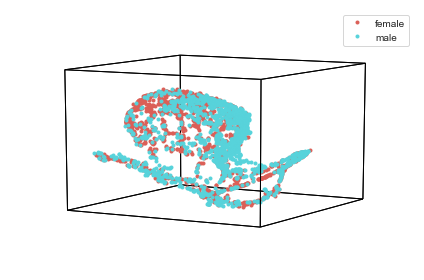

In [10]:
geo_tsne = hyp.plot(data1, '.', hue=class_label, legend=list(set(class_label)), reduce='TSNE', ndims=3)

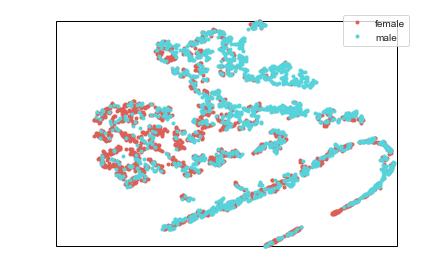

In [11]:
geo_tsne = hyp.plot(data1, '.', hue=class_label, legend=list(set(class_label)), reduce='TSNE', ndims=2)

Above 3D and 2D hyperplot show the clear classification of male and female voice with the help of all the features in the given dataset.

Text(0.5,1,'Count plot for label')

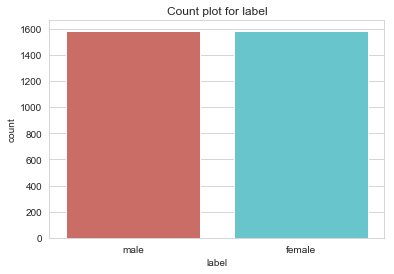

In [12]:
sns.countplot(x='label', data=data).set_title('Count plot for label')

The above graph shows that the datset contains __equal number__ of __male and female voice samples__.

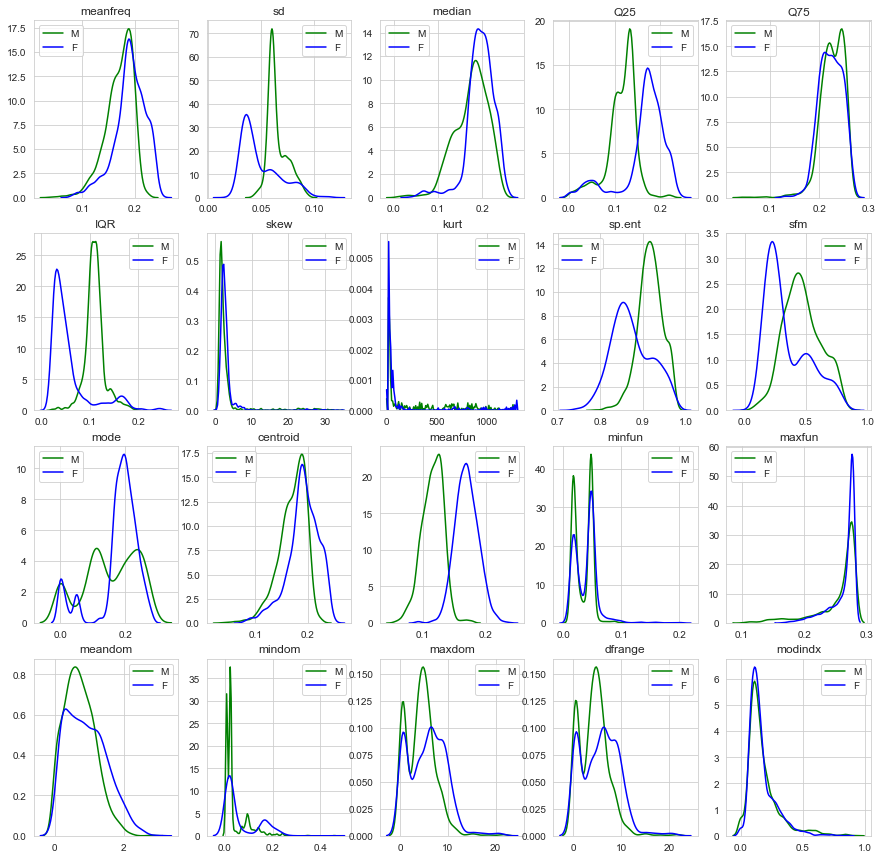

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(data.columns[i-1])
    sns.kdeplot(data.loc[data['label'] == 'male', data.columns[i-1]], color= 'green', label='M')
    sns.kdeplot(data.loc[data['label'] == 'female', data.columns[i-1]], color= 'blue', label='F')

We observe that __Q25,IQR and meanfun__ are the major variables contributing to the difference between the male and female voice, followed by __sd, sp.ent and sfm__

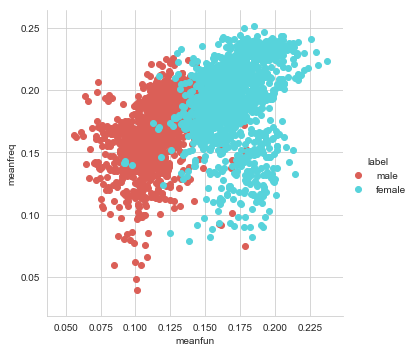

In [14]:
sns.FacetGrid(data, hue="label", height=5)\
   .map(plt.scatter, "meanfun", "meanfreq")\
   .add_legend()
plt.show()

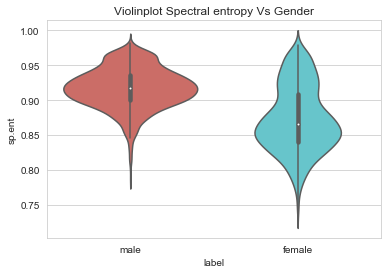

In [15]:
sns.violinplot('label','sp.ent', kind='point', data = data)
plt.title('Violinplot Spectral entropy Vs Gender')
plt.show()

Most of male voice samples fall under Spectral entropy range between 0.92 and 0.93. Where as many female voice samples have got 0.85 spectral entropy.  

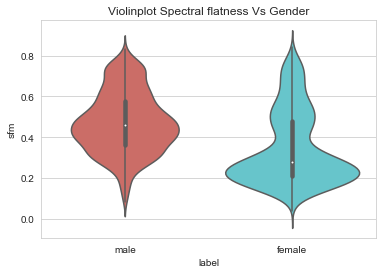

In [16]:
sns.violinplot('label','sfm', kind='point', data = data)
plt.title('Violinplot Spectral flatness Vs Gender')
plt.show()

More __Female__ voice samples have got __low Spectral flatness__ compared to male. 

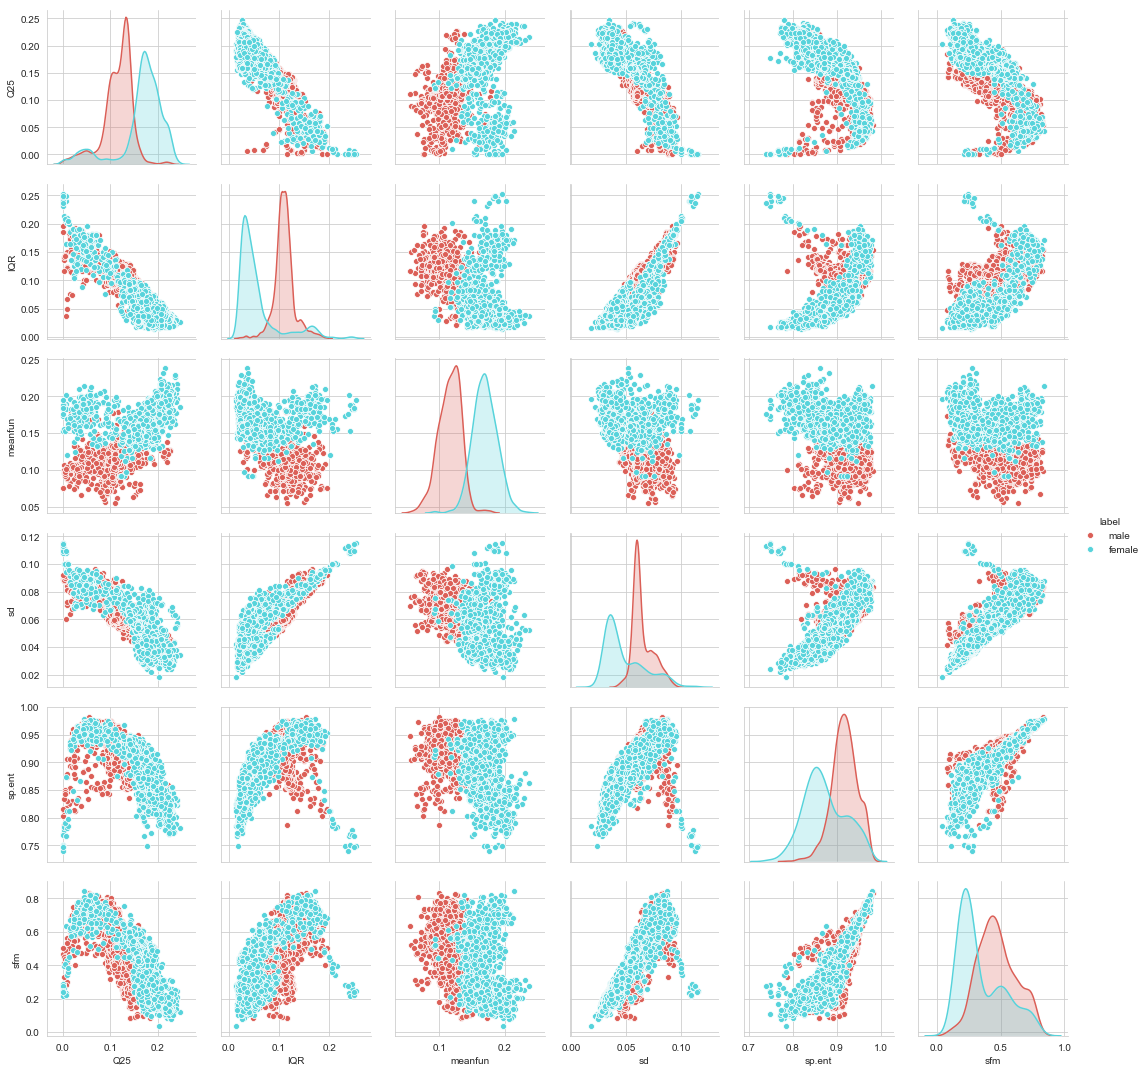

In [17]:
sns.pairplot(data[['Q25','IQR','meanfun','sd','sp.ent','sfm','label']], hue='label')
#sns.pairplot(data[['Q25', 'IQR', 'meanfun', 'sd', 'label']],hue='label', size=2)
#plt.show()

Text(0.5,1,'Correlation between features')

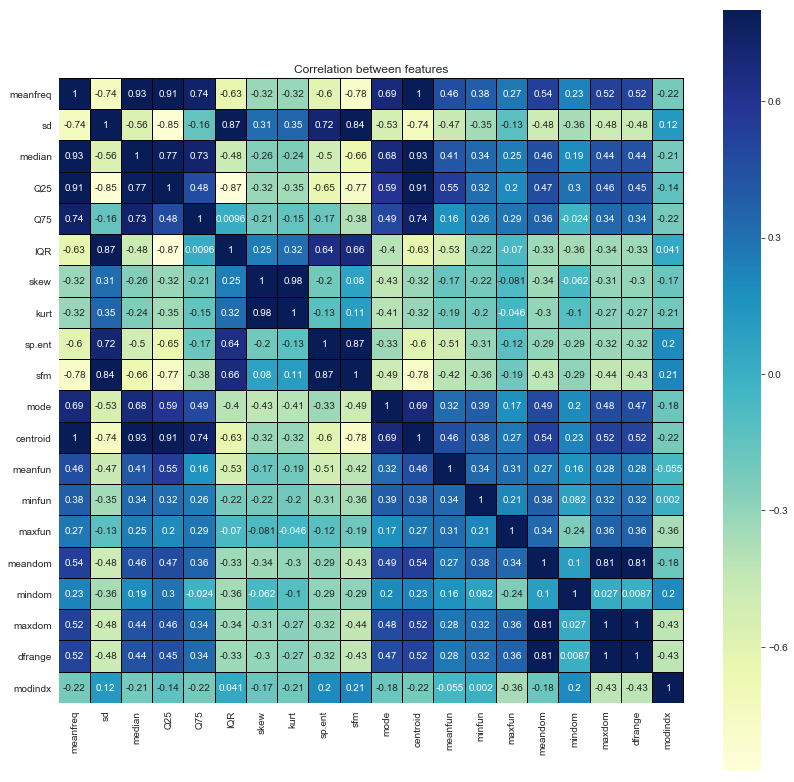

In [18]:
corr = data.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

meanfreq, median, Q25, Q75, centroid are positively correlated.  sfm-centroid, IQR-Q25, sd-centroid, sd-meanfreq are negatively correlated with each other.

<a id=section4></a>

<a id=section5></a>

### 5. Preparing and splitting X and Y

In [19]:
x = voice.loc[:,voice.columns != 'label_male']          #Preparing X and Y
y = voice.label_male

In [20]:
from sklearn.preprocessing import StandardScaler         #Standardising x
scaler = StandardScaler().fit(x)
data_scaled = scaler.transform(x)

In [21]:
#Splitting X and y into training and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [22]:
print('Train cases as below')              #checking train, test split
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
x_train shape:  (2534, 20)
y_train shape:  (2534,)

Test cases as below
x_test shape:  (634, 20)
y_test shape:  (634,)


In [23]:
def classify(model,x_train,y_train,x_test,y_test,algo):
    '''Function to predict and calculate the matrices for model evaluation'''
    model.fit(x_train,y_train)
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import roc_auc_score
    y_pred=model.predict(x_test)
    score = pd.DataFrame({'Algorithm': [algo],
                          'Accuracy': [accuracy_score(y_test,y_pred)],
                          'Precision': [precision_score(y_test,y_pred)], 
                          'Recall': [recall_score(y_test,y_pred)], 
                          'f1_Score': [f1_score(y_test,y_pred)],
                          'AUC_ROC_Score': [roc_auc_score(y_test, y_pred[:])]})
    return score

<a id=section5></a>

<a id=section6></a>

### 6. Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
algo = 'LogisticRegression'
logreg_results = classify(model,x_train,y_train,x_test,y_test,algo)
logreg_results

,Algorithm,Accuracy,Precision,Recall,f1_Score,AUC_ROC_Score
0,LogisticRegression,0.897476,0.858333,0.956656,0.904832,0.896335


<a id=section6></a>

<a id=section7></a>

### 7.Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

model = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
algo = 'DecisionTree'
dt_results = classify(model,x_train,y_train,x_test,y_test,algo)
dt_results

,Algorithm,Accuracy,Precision,Recall,f1_Score,AUC_ROC_Score
0,DecisionTree,0.970032,0.984076,0.956656,0.970173,0.97029


<a id=section7></a>

<a id=section8></a>

### 8.Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 0,n_estimators=8)
algo = 'RandomForest'
rf_results = classify(model,x_train,y_train,x_test,y_test,algo)
rf_results

,Algorithm,Accuracy,Precision,Recall,f1_Score,AUC_ROC_Score
0,RandomForest,0.973186,0.981132,0.965944,0.973479,0.973326


<a id=section8></a>

<a id=section9></a>

### 9. KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski')   #Instantiate K nearest neighbour classifier
algo = 'KNN'
knn_results = classify(model,x_train,y_train,x_test,y_test,algo)
knn_results

,Algorithm,Accuracy,Precision,Recall,f1_Score,AUC_ROC_Score
0,KNN,0.974763,0.981191,0.96904,0.975078,0.974874


<a id=section9></a>

<a id=section10></a>

### 10. SVM

In [28]:
from sklearn.svm import SVC
model = SVC(kernel='linear',C=7)
algo = 'SVM'
svm_results = classify(model,x_train,y_train,x_test,y_test,algo)
svm_results

,Algorithm,Accuracy,Precision,Recall,f1_Score,AUC_ROC_Score
0,SVM,0.960568,0.954268,0.96904,0.961598,0.960404


<a id=section10></a>

<a id=section11></a>

### 11. Naive Bayes

In [29]:
from sklearn import naive_bayes
model=naive_bayes.GaussianNB()
algo = 'NaiveBayes'
nb_results = classify(model,x_train,y_train,x_test,y_test,algo)
nb_results

,Algorithm,Accuracy,Precision,Recall,f1_Score,AUC_ROC_Score
0,NaiveBayes,0.869085,0.877358,0.863777,0.870515,0.869188


<a id=section11></a>

<a id=section12></a>

### 12. Summary

In [34]:
pd.concat([logreg_results, dt_results, rf_results, knn_results, svm_results, nb_results], axis=0, ignore_index=True)

,Algorithm,Accuracy,Precision,Recall,f1_Score,AUC_ROC_Score
0,LogisticRegression,0.897476,0.858333,0.956656,0.904832,0.896335
1,DecisionTree,0.970032,0.984076,0.956656,0.970173,0.970290
2,RandomForest,0.973186,0.981132,0.965944,0.973479,0.973326
3,KNN,0.974763,0.981191,0.969040,0.975078,0.974874
4,SVM,0.960568,0.954268,0.969040,0.961598,0.960404
5,NaiveBayes,0.869085,0.877358,0.863777,0.870515,0.869188


__KNN__ model has got the highest score in all the metric test and with __97.6% accuracy__.

<a id=section12></a>